<a href="https://colab.research.google.com/github/yeb2Binfang/DS_GY_3001_CV/blob/main/HW/HW3/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 3: Mean Shift

**Due date:** April 4th 2021

The goal of the assignment is to implement the mean shift algorithm and use it for image segmentation. You should return the completed notebook, including answers and illustrations. 


**Part 1: mean shift on synthetic data**

* Generate a synthetic dataset of 100 2D points, containing 60 points sampled from a Gaussian distribution of unit covariance centered in (0,0) and 40 points sampled from a Gaussian with unit covariance centered in (4,4). Visualize your data.
* Implement a function that computes $G(x) = g(\|x\|^2/h^2)$ where $x \in \mathbb R^d$, $h$ is a bandwidth parameter and $g$ is the negative derivative of the Gaussian kernel or of the Epanechnikov kernel (see eq. 5.36 in Szeliski).  Plot $G(x)$ for $d=1$.
* Implement a function `MS_step` that takes as input a starting point `x`, a set of data points `data`, and a bandwidth `h` and returns the updated position of the point `x` after one step of the mean-shift algorithm.
* Implement the function `MS_point` which iterates `MS_step` until convergence (i.e., when the estimate changes by less than a small constant). Test it on your synthetic data and visualize the results.
* Implement the full mean shift algorithm by iterating `MS_point` on all the points, and merging modes for which distance is less than some constant. It should return a list of the modes and a label (corresponding to a mode) for each point. Visualize your results.
* Modify the previous code by allowing for a "bandwidth vector" $h \in \mathbb R^d$ that defines a different scale for each dimension of the input (this is because for segmentation we will use a different bandwidth for space and color). Note that you should also modify the convergence and merging conditions to consider this non-isotropic scaling.
* Experiment with your code by changing the data distribution, the kernel, and and bandwidth vector.

**Part 2: mean shift for image segmentation**

* For image segmentation, we will use the "Lab" color space because it approximates the way humans perceive color better than RGB. Load the image `veggies_small.jpg`, and convert it to the Lab colorspace using the command `rgb2lab`. What is the range of the colorvalues in Lab? 
* Convert the (N,M,3) image into an (NM,5) matrix incuding color and position information for each point (tip: use the `np.meshgrid` function). What do you think might be a good choice for a bandwidth vector $h$?
* Use your mean shift code from the previous section to compute a meaningful segmentation of the image. Visualize the results as an image by replacing the color values of the pixels associated with each mode by the color of the mode. You can also try our algorithm on other (small) images.

## Part 1: mean shift on synthetic data

### 1. Generate synthetic data

Generate a synthetic dataset of 100 2D points, containing 60 points sampled from a Gaussian distribution of unit covariance centered in (0,0) and 40 points sampled from a Gaussian with unit covariance centered in (4,4). Visualize your data.

In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
mean1 = [0, 0]
mean2 = [4, 4]
cov = [[1, 0], [0, 1]]  # diagonal covariance

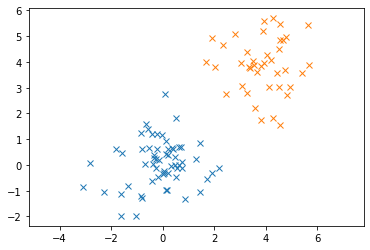

In [4]:
x1, y1 = np.random.multivariate_normal(mean1, cov, 60).T
x2, y2 = np.random.multivariate_normal(mean2, cov, 40).T
plt.plot(x1, y1, 'x')
plt.plot(x2, y2, 'x')
plt.axis('equal')
plt.show()

we concat data together

In [5]:
data = np.concatenate((np.array([x1,y1]).T,np.array([x2,y2]).T))

### 2. Compute G(x)
Implement a function that computes $G(x) = g(\|x\|^2/h^2)$ where $x \in \mathbb R^d$, $h$ is a bandwidth parameter and $g$ is the negative derivative of the Gaussian kernel or of the Epanechnikov kernel (see eq. 5.36 in Szeliski).  Plot $G(x)$ for $d=1$.

In [6]:
def gaussian_g(r):
    # insert your code here   
    return np.exp(-0.5*r)

def kernel(z,bandwidths):
    # insert your code here
    r = (z**2/bandwidths**2)
    return g(r)

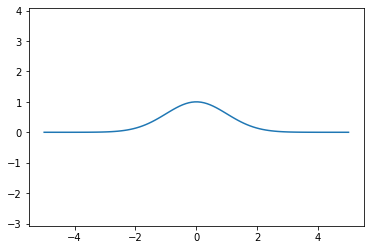

In [7]:
x = np.linspace(-5,5,100)
h = 1
g = gaussian_g
y = [kernel(xi,np.array([h])) for xi in x]
plt.plot(x,y)
plt.axis('equal')
plt.show()

In [65]:
bandwidths = np.array([2,2])

In [66]:
def MS_step(x, data, bandwidths):
    # TODO: Implement a function `MS_step` that takes as input a starting point `x`,
    # a set of data points `data`, and a bandwidth `h` and returns the updated 
    # position of the point `x` after one step of the mean-shift algorithm.

    # insert your code here
    weights = np.zeros(data.shape[0])
    for i in range(data.shape[0]): 
      dist = np.linalg.norm(data[i]-x) 
      dis[i] = dist
      weights[i] = np.sum(kernel(dist,bandwidths[0]))
    shifted_point = (data.T).dot(weights)/ sum(weights)
    return shifted_point

In [67]:
p = MS_step(data[0], data, bandwidths)
print(p)

[-0.09468583  0.13474506]


In [68]:
def MS_point(x, data, bandwidths):
  pre_point = x
  shifted_point = x
  while True:
    shifted_point = MS_step(x, data, bandwidths)
    
    if np.linalg.norm(pre_point-shifted_point)<0.0000000001:
      break;
    pre_point=shifted_point
  return shifted_point

In [69]:
p1 = MS_point(data[89], data, bandwidths)
print(p1)
print(data[89])

[3.34917806 3.54207584]
[3.05066571 3.95586536]


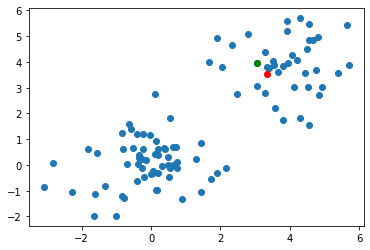

In [70]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(data[89][0],data[89][1], color='g')
plt.scatter(p1[0],p1[1],color='r')

In [ ]:
def ms_test(data):
  centroid = []
  for x in data:
    shiftd = MS_point(x, data, bandwidths)

### 3. Implement MS_step
Implement a function `MS_step` that takes as input a starting point `x`, a set of data points `data`, and a bandwidth `h` and returns the updated position of the point `x` after one step of the mean-shift algorithm.


In [8]:
print(data[0])

[-0.6831669   0.02036992]


In [113]:
MIN_DISTANCE = 0.00001
GROUP_DISTANCE_TOLERANCE = .005
bandwidths = np.array([2,2])
g = gaussian_g


def MS_step(x, data, bandwidths):
    # TODO: Implement a function `MS_step` that takes as input a starting point `x`,
    # a set of data points `data`, and a bandwidth `h` and returns the updated 
    # position of the point `x` after one step of the mean-shift algorithm.

    # insert your code here
    weights = np.zeros(data.shape[0])
    for i in range(data.shape[0]): 
      dist = np.linalg.norm(data[i]-x) 
      weights[i] = np.sum(kernel(dist,bandwidths),axis=0)
    shifted_point = (data.T).dot(weights)/ sum(weights)
    return shifted_point

def find_distance_to_group(point, group, bandwidths):
    # find shortest distance from point to a set of points in group 
    # insert your code here
    min_distance = np.inf
    for group_pt in group:
      diff = point - group_pt
      dist = np.sum(diff*diff/(bandwidths*bandwidths))
      if dist<min_distance:
        min_distance = dist
    return min_distance

def determine_nearest_group(point,groups,bandwidths):
    # find points group closes to point
    # insert your code here
    nearest_group_index = 0
    min_temp = np.inf
    for index, group in enumerate(groups):
      min_distance = find_distance_to_group(point,group,bandwidths)
      if min_distance<min_temp:
        min_distance = min_temp
        nearest_group_index = index
    return nearest_group_index

def group_points(points, bandwidths):
    # merge points array to nearest group, if it exists
    # insert your code here
    groups = []
    group_assignment_array = []
    group_index = 0
    for point in points:
      idx_nearest_group = determine_nearest_group(point,groups,bandwidths) 
      if idx_nearest_group: # if nearest group is found
        group_assignment_array.append(idx_nearest_group)
      else:
        groups.append([point])
        print(groups)
        group_assignment_array.append(group_index)
        group_index+=1
    return group_assignment_array

# def find_modes(points,assignments):
#     # find modes
#     # insert your code here
#     # for each group, return np.mean(group_points)
#     for group in assignments:

#     return modes
    
def MS_point(data,bandwidths):
    # Implement the function `MS_point` which iterates `MS_step` until convergence
    #  (i.e., when the estimate changes by less than a small constant). Test it on 
    # your synthetic data and visualize the results.
    data_temp = np.copy(data)
    for x in data_temp:
      while True:
        x1 = MS_step(x,data,bandwidths)
        delta = x-x1
        dist = np.sum((delta*delta)/(bandwidths*bandwidths), axis=0)
        
        if dist < MIN_DISTANCE:
          break
        x[:] = x1
    data_dynamic = data_temp
    # insert your code here
    return data_dynamic

'''
# TODO: uncomment when completed above functions
data_new = MS_point(data,bandwidths)
# plot your graph here

assignment = group_points(data_new,bandwidths)
modes = find_modes(data_new,assignment)
# plot your graph here
'''

'\n# TODO: uncomment when completed above functions\ndata_new = MS_point(data,bandwidths)\n# plot your graph here\n\nassignment = group_points(data_new,bandwidths)\nmodes = find_modes(data_new,assignment)\n# plot your graph here\n'

In [93]:
bandwidths = np.array([2,2])
data_new = MS_point(data,bandwidths)

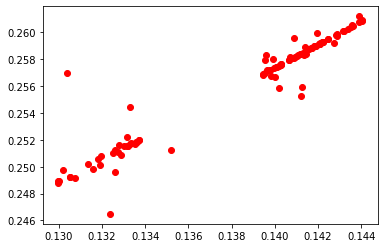

In [101]:
#plt.scatter(data[:,0],data[:,1],color='b',marker='x')
plt.scatter(data_new[:,0],data_new[:,1],color='r',marker='o')

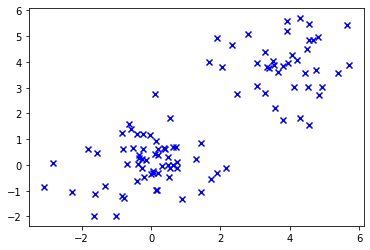

In [102]:
plt.scatter(data[:,0],data[:,1],color='b',marker='x')

In [114]:
assignment = group_points(data_new,bandwidths)

[[array([0.13328796, 0.25168452])]]
[[array([0.13328796, 0.25168452])], [array([0.14404913, 0.2609482 ])]]


In [110]:
print(len(assignment))

100


### 4. Implement MS_point

### 5. Mean shift algorithm 

### 6. Modify the code

### 7. Experiments

## Part 2: mean shift for image segmentation

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from skimage.color import rgb2lab,lab2rgb

### 1. Color_range of lab

### 2. Vector

### 3. Apply the mean shift algorithm to the images